In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [3]:
# this will be the file that feature extractor notebook generates for each script
out_fn = '/Users/vassiki/Desktop/narrative_complexity/code/notebooks/annotations_with_char_embeddings.csv'
out_df = pd.read_csv(out_fn)

In [4]:
def get_chars_from_df(out_df):   
    """
    Function to clean up unique list of characters, will be redundant after
    the feature extraction notebook is updated
    
    Parameters
    ----------
    out_df: output csv for each script with segmented events as rows
    
    Returns
    -------
    characters: 2d list of unique characters in each event
    """
    characters = []
    for row in range(out_df.shape[0]):
    
        character_per_event = eval(out_df.loc[row, 'characters'])
        unique_chars_events = character_per_event.keys()
        chars_ev = [' '.join(c.split()) for c in list(unique_chars_events)]
        first_name = [c.split(' ')[0] for c in chars_ev]
        unique_first = list(dict.fromkeys(first_name))
        # pos tag
        #pos_tag_names = nltk.pos_tag(unique_first)
        #noun_names = [n[0] for n in pos_tag_names if 'VB' not in n[1]]

        characters.append(unique_first)
    return characters

In [5]:
def get_cooccurence_matrix_one_event(characters, event_num=0):
    """
    Function to create cooccurence matrix for all characters in an event.
    
    Parameters
    ----------
    characters: 2d list of unique characters in each event
    event_num: default 0, row number of event to return cooccurence matrix for
    
    Returns
    -------
    co_occurence_df: unique char by unique char dataframe with tallies
                        for character cooccurences
    """
    chars = list(dict.fromkeys(sum(characters,[])))
    total_array_size = len(chars)
    co_occurence_array = np.zeros((total_array_size, total_array_size))
    co_occurence_df = pd.DataFrame(co_occurence_array, columns = chars, index=chars)
    all_pairs = list(itertools.combinations(characters[event_num], 2))
    
    for pair in all_pairs:
        co_occurence_df.loc[pair[0], pair[1]] += 1
    return co_occurence_df

In [6]:
def get_cooccurence_matrix_all_events(characters):
    """
    Function to create cooccurence matrix across all events
    
    Parameters
    ----------
    characters: 2d list of unique characters in each event
    
    Returns
    -------
    co_occurence_df: character by character cooccurence matrix across
                        all events
    """
    chars = list(dict.fromkeys(sum(characters,[])))
    total_array_size = len(chars)
    co_occurence_array = np.zeros((total_array_size, total_array_size))
    co_occurence_df = pd.DataFrame(co_occurence_array, columns = chars, index=chars)
    for event_chars in range(len(characters)):
        all_pairs = list(itertools.combinations(characters[event_chars], 2))
        for pair in all_pairs:
            co_occurence_df.loc[pair[0], pair[1]] += 1
    return co_occurence_df

In [7]:
def plot_one_event_cooccurence(fn, chars, num=0):
    """
    Function to plot each event's cooccurence matrix
    
    Parameters:
    fn: filename to save the co-occurence plot with
    chars: 2d list of unique characters in each event 
    num: default 0, event number
    """
    cdf  = get_cooccurence_matrix_one_event(chars, num)
    l = list(cdf.columns)
    plt.subplots(figsize=(20,15))
    sns.heatmap(cdf, xticklabels=l, yticklabels=l)
    plt.savefig(fn, bbox_inches = "tight")

In [8]:
def plot_all_events_cooccurence(fn, chars):
    """
    Function to plot cooccurence matrix across all events
    
    Parameters:
    fn: filename to save the co-occurence plot with
    chars: 2d list of unique characters in each event
    """    
    cca = get_cooccurence_matrix_all_events(chars)
    labels = list(cca.columns)
    plt.subplots(figsize=(20,15))
    sns.heatmap(cca, xticklabels=labels, yticklabels=labels)
    plt.savefig(fn, bbox_inches = "tight")

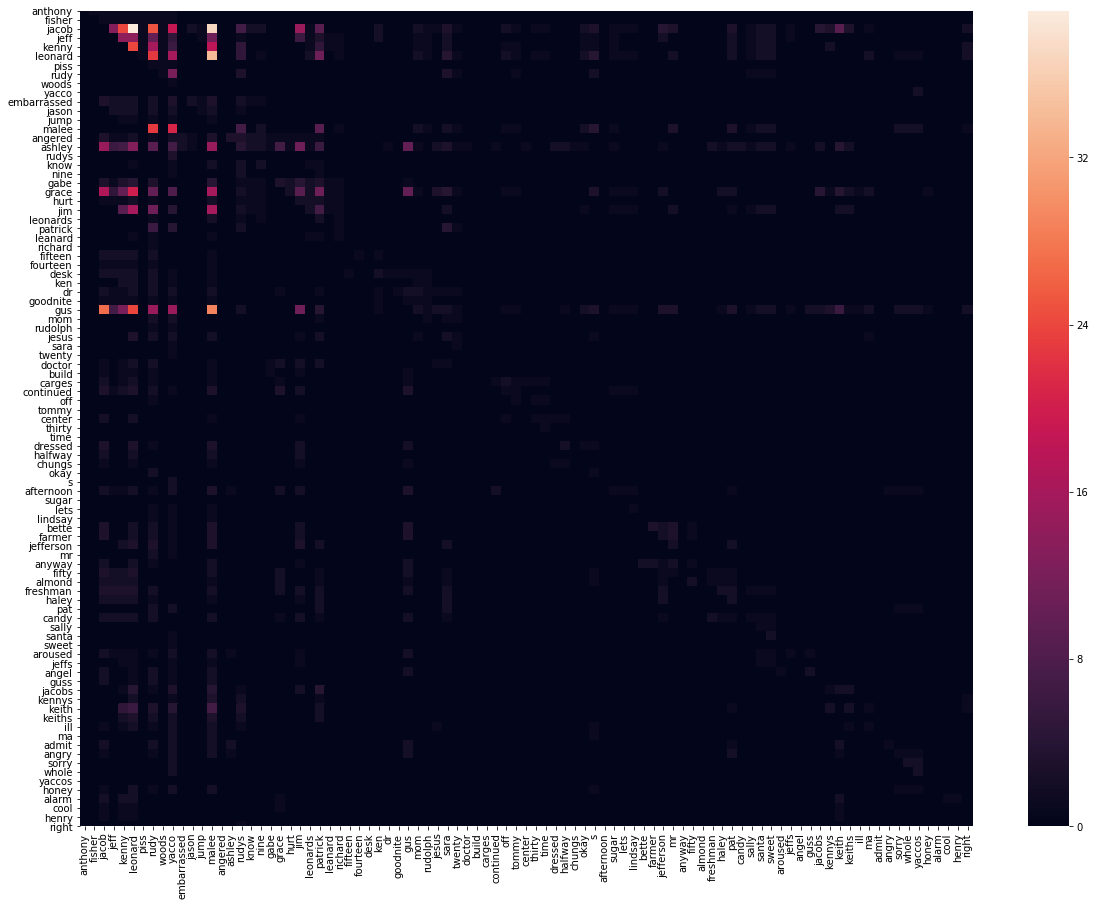

In [9]:
# generate plot for all events
characters = get_chars_from_df(out_df)
root_dir = '/Users/vassiki/Desktop/narrative_complexity/notebooks/figures/'
fn = os.path.join(root_dir, 'character_occurence.png')
plot_all_events_cooccurence(fn, characters)

In [ ]:
# generate plot for one event at a time
characters = get_chars_from_df(out_df)
root_dir = '/Users/vassiki/Desktop/narrative_complexity/notebooks/figures/'
for event_num in range(len(characters)):
    fn = os.path.join(root_dir, 'character_occurence_event_{0}.png'.format(event_num))
    plot_one_event_cooccurence(fn, characters, event_num)

Run `convert -delay 10 -loop 0 *event*.png cooccurence.gif` in bash to generate gif from all events from the figures subdirectory